# Latar Belakang

Data Transjakarta yang berasal dari sistem smart card (e-ticket) mengandung informasi berharga tentang pola perjalanan penumpang, preferensi rute, dan karakteristik demografis pengguna. Analisis ini dapat membantu Perusahaan Transjakarta dalam meningkatkan layanan, optimasi rute, dan perencanaan strategis.

# Pernyataan Masalah (Problem Statement)

1. Apa pola perjalanan paling umum berdasarkan waktu (jam sibuk vs non-sibuk)?

2. Bagaimana distribusi usia penumpang Transjakarta?

**3. Rute mana yang paling banyak dan paling sedikit digunakan?**

4. Apakah ada perbedaan pola perjalanan berdasarkan jenis kelamin?

5. Bagaimana pola pembayaran (free vs paid) terdistribusi?

# Data

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait demografis, edukasi dan pengalaman kerja kandidat yang diisi ketika peserta mendaftar untuk ikut pelatihan. Ada 22 kolom di dalam dataset Transjakarta, yaitu:  

1. transID: ID transaksi unik untuk setiap transaksi
2. payCardID: Pengidentifikasi utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket masuk dan keluar.
3. payCardBank: Nama bank penerbit kartu pelanggan
4. payCardName: Nama pelanggan yang disematkan di kartu.
5. payCardSex: Jenis kelamin pelanggan yang disematkan di kartu
6. payCardBirthDate: Tahun lahir pelanggan
7. corridorID: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
8. corridorName: Nama Koridor / Nama Rute berisi Mulai dan Selesai untuk setiap rute.
9. direction: 0 untuk Pergi, 1 untuk Kembali. Arah rute. 10. tapInStops: ID Perhentian Tap In (pintu masuk) untuk mengidentifikasi nama perhentian
11. tapInStopsName: Nama Perhentian Tap In (pintu masuk) tempat pelanggan melakukan tap in.
12. tapInStopsLat: Lintang Perhentian Tap In
13. tapInStopsLon: Bujur Perhentian Tap In
14. stopStartSeq: Urutan perhentian, perhentian pertama, perhentian kedua, dst. Terkait dengan arah.
15. tapInTime: Waktu tap in. Tanggal dan waktu
16. tapOutStops: ID Perhentian Tap Out (Keluar) untuk mengidentifikasi nama perhentian
17. tapOutStopsName: Nama Perhentian Tap out (keluar) tempat pelanggan melakukan tap out. 18. tapOutStopsLat: Lintang Tempat Berhenti Tap Out
19. tapOutStopsLon: Bujur Tempat Berhenti Tap Out
20. stopEndSeq: Urutan tempat berhenti, tempat berhenti pertama, tempat berhenti kedua, dst. Terkait dengan arah.
21. tapOutTime: Waktu tap out. Tanggal dan waktu
22. payAmount: Jumlah yang dibayarkan pelanggan. Sebagian gratis. Sebagian tidak.


Berikut 5 baris teratas dan terbawah dari dataset Transjakarta

In [371]:
df = pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset Transjakarta Bulan April 2023

In [372]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [373]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


Secara umum, kita bisa melihat bahwa:
* dataset Transjakarta memiliki 22 kolom dan 37.900 baris
* beberapa kolom, yaitu, `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data nan.
* Kolom dengan Data Lengkap (Non-Null Count = 37980):
`transID`, `payCardID`, `payCardBank`, `payCardName`, `payCardSex`, `payCardBirthDate`, `direction`, `tapInstopsName`, `tapInstopsLat`, `tapInstopsLon`, `stopStartSeq`, `tapInTime`:
Kolom-kolom ini tidak memiliki nilai null. Periksa konsistensi data, duplikat, atau nilai yang tidak wajar (misalnya, `payCardSex` harus hanya mengandung nilai 'Male' atau 'Female').
* Kolom dengan Data Tidak Lengkap:
`corridorID` (36643 non-null): Terdapat 1337 nilai null. Lakukan imputasi atau hapus baris yang null jika tidak signifikan.
`corridorName` (35970 non-null): Terdapat 2010 nilai null. Periksa hubungannya dengan corridorID dan lakukan imputasi atau hapus baris.
`tapInstops` (36687 non-null): Terdapat 1293 nilai null. Periksa apakah null berarti data tidak tersedia atau kesalahan input.
`tapOutStops` (35611 non-null), `tapOutStopsName` (36556 non-null), `tapOutStopsLat` (36556 non-null), `tapOutStopsLon` (36556 non-null), `tapOutTime` (36556 non-null):
Kolom-kolom ini memiliki sekitar 1424-2369 nilai null. Nilai null mungkin menunjukkan transaksi yang belum selesai (misalnya, penumpang tidak tap out). Pertimbangkan untuk menganalisis transaksi tidak lengkap secara terpisah.
`payAmount` (36893 non-null): Terdapat 1087 nilai null. Lakukan imputasi berdasarkan rata-rata atau median, atau hapus baris jika perlu.
* Kolom dengan Tipe Data yang Perlu Diperiksa:
`payCardBirthDate` (int64): Ubah ke tipe datetime jika merepresentasikan tanggal.
`tapInTime` dan `tapOutTime` (object): Ubah ke tipe datetime untuk analisis temporal.
`direction` (float64): Periksa apakah nilai hanya 0 atau 1 (jika merepresentasikan arah), dan ubah ke tipe kategori jika perlu.
* Langkah Tambahan:
Duplikat: Periksa dan hapus duplikat berdasarkan `transID`.
Outlier: Identifikasi outlier pada kolom numerik seperti `payAmount`, `tapInstopsLat`, `tapInstopsLon`, dll.
* Konsistensi: Pastikan nilai `tapOutTime` selalu setelah `tapInTime` untuk setiap transaksi.
* Feature Engineering: Buat kolom baru seperti durasi perjalanan (selisih `tapOutTime` dan `tapInTime`) atau kategori usia dari `payCardBirthDate`.
* Analisis Khusus:
Jika `tapOutStops` null menunjukkan transaksi tidak lengkap, analisis pola transaksi tersebut (misalnya, apakah terkait dengan koridor tertentu atau waktu tertentu).

## Penanganan Missing Values

In [374]:
# Hitung persentase missing values per kolom
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64


Secara garis besar:  
* *missing value* ada di kolom `corridorID`, `corridorName`, `tapInStops`, `tapOutStops` dll memiliki proporsi yang cukup rendah (<10%)
* Untuk *missing value* kecil, bisa diisi dengan mean/median/mode

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*.
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

**Kolom Kategorikal (Categorical)**

Penanganan:

- Isi dengan modus (nilai yang paling sering muncul)

- Atau tambahkan kategori "Unknown"/"Tidak Diketahui"

**Kolom Numerik**

Penanganan:

- Isi dengan mean/median jika distribusi normal

- Isi dengan 0 jika memang tidak ada nilai yang valid

- Untuk ID, pertimbangkan untuk tidak mengisi (biarkan null) karena ID seharusnya unik

In [375]:
# Untuk kolom kategorikal
categorical_cols = ['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutTime']
for col in categorical_cols:
    df[col].replace(0, df[col].mode()[0], inplace=True)  # atau 'Unknown'

In [376]:
# Untuk kolom numerik
numeric_cols = ['tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'payAmount']
for col in numeric_cols:
    df[col].replace(0, df[col].median(), inplace=True)  # atau mean()

In [377]:
# Untuk kolom kategorikal
#df['corridorID'].fillna(df['corridorID'].mode()[0], inplace=True)
#df['corridorName'].fillna(df['corridorName'].mode()[0], inplace=True)
#df['tapInStops'].fillna(df['tapInStops'].mode()[0], inplace=True)
#df['tapOutStops'].fillna(df['tapOutStops'].mode()[0], inplace=True)
#df['tapOutStopsName'].fillna(df['tapOutStopsName'].mode()[0], inplace=True)
#df['tapOutTime'].fillna(df['tapOutTime'].mode()[0], inplace=True)

# Untuk kolom numerik
#df['tapOutStopsLat'].fillna(df['tapOutStopsLat'].median(), inplace=True)
#df['tapOutStopsLon'].fillna(df['tapOutStopsLon'].median(), inplace=True)
#df['stopEndSeq'].fillna(df['stopEndSeq'].median(), inplace=True)

# Untuk missing values kecil, bisa diisi dengan mean/median/mode
#df['payAmount'].fillna(df['payAmount'].median(), inplace=True)


In [378]:
# print(df.isnull().sum())

**Konversi tipe data (misal: `tapInTime` dan `tapOutTime` ke datetime)**

In [379]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

**Hapus duplikat**

In [380]:
df.drop_duplicates(inplace=True)

**Perbaiki inkonsistensi (misal: `payCardSec` harus hanya "Male" atau "Female")**

In [381]:
df['payCardSex'] = df['payCardSex'].str.capitalize()  # Normalisasi penulisan
df['payCardSex'] = df['payCardSex'].replace({'M': 'Male', 'F': 'Female'})

**Hitung usia dari `payCardBirthDate`**

In [382]:
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['payCardBirthDate']

**Hitung durasi perjalanan (dalam menit)**

In [383]:
df['trip_duration'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **segmentasi penumpang**.  

**Distribusi Usia Penumpang**

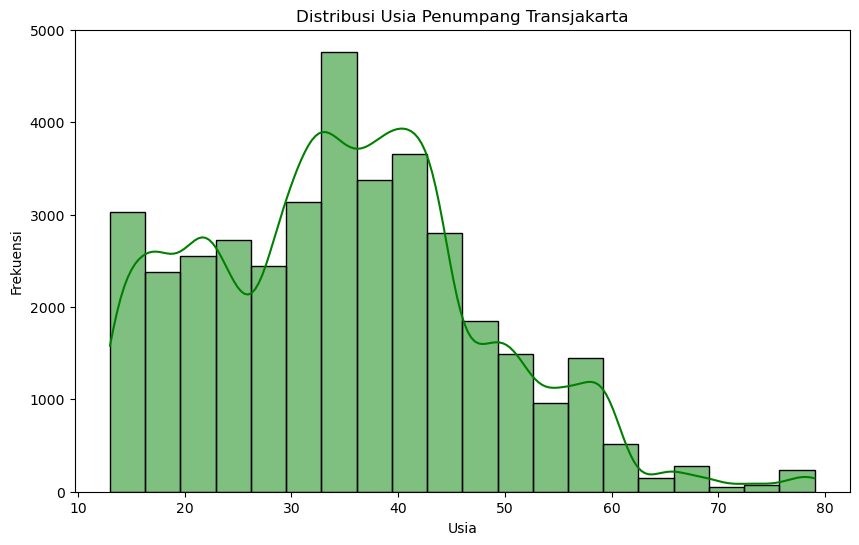

In [385]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, color='green', kde=True)
plt.title('Distribusi Usia Penumpang Transjakarta')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

**Jenis Kelamin Penumpang**

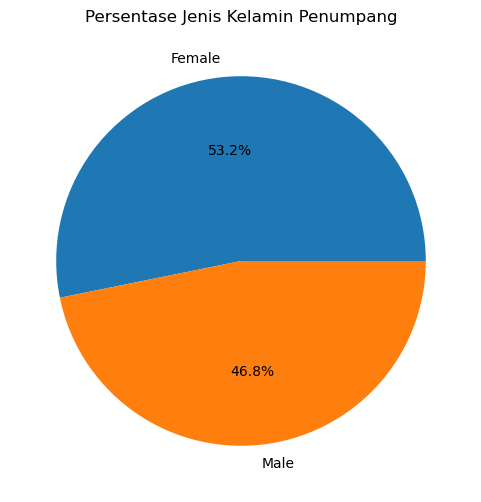

In [386]:
gender_counts = df['payCardSex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Persentase Jenis Kelamin Penumpang')
plt.show()

**Rute Paling Populer**

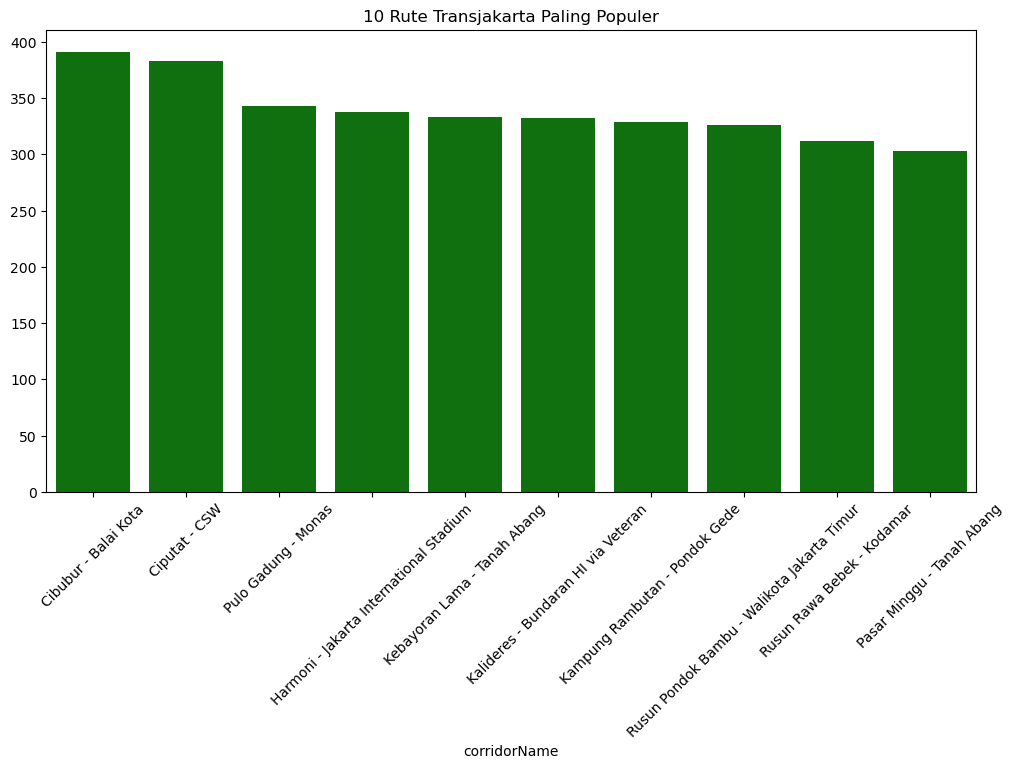

In [387]:
top_routes = df['corridorName'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_routes.index, y=top_routes.values, color='green')
plt.title('10 Rute Transjakarta Paling Populer')
plt.xticks(rotation=45)
plt.show()

**Pola Waktu Perjalanan (Jam Sibuk vs Non-Sibuk)**

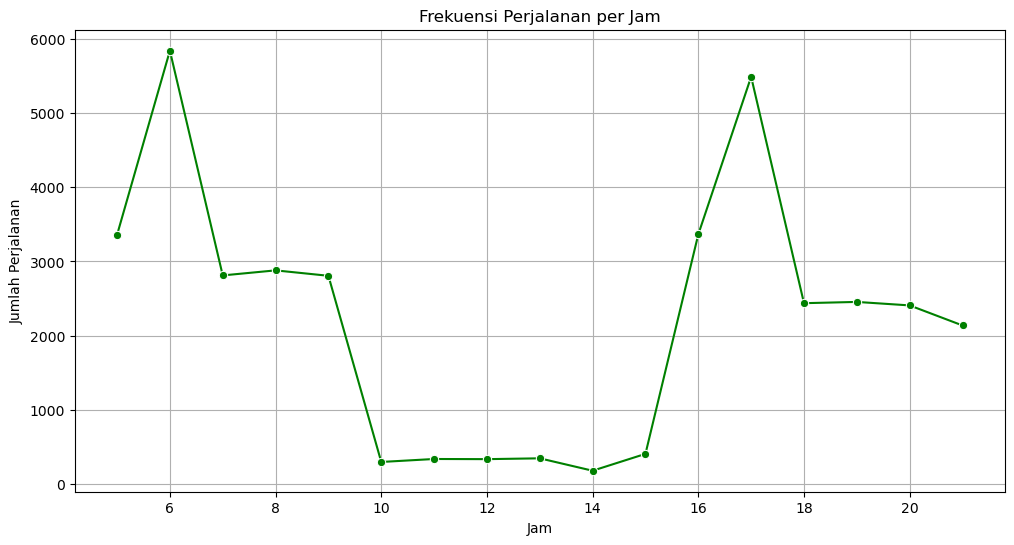

In [388]:
df['hour'] = df['tapInTime'].dt.hour
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='green')
plt.title('Frekuensi Perjalanan per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Perjalanan')
plt.grid(True)
plt.show()

## Kesimpulan Awal
- Distribusi Usia: Mayoritas penumpang berada di rentang usia 30-40 tahun.

- Jenis Kelamin: lebih banyak penumpang perempuan (53%) daripada laki-laki (47%).

- Pembayaran: Sebagian besar perjalanan gratis atau murah, dengan beberapa outlier.

- Rute Populer: Beberapa koridor seperti Cibubur - Balai Kota dan Ciputat - CSW paling banyak digunakan.

- Jam Sibuk: Puncak perjalanan terjadi pada pagi (6 AM) dan sore (5 PM).

# Analisis Rute Transjakarta: Populer vs. Sepi untuk Optimasi Operasional
## Ranking Rute Berdasarkan Volume Penumpang

In [389]:
# Hitung frekuensi perjalanan per rute
route_popularity = df['corridorName'].value_counts().reset_index()
route_popularity.columns = ['corridorName', 'trip_count']

# Normalisasi untuk melihat persentase
route_popularity['percentage'] = (route_popularity['trip_count'] / route_popularity['trip_count'].sum()) * 100

# Urutkan dari yang terpopuler
route_popularity = route_popularity.sort_values('trip_count', ascending=False)

# Pisahkan 10 teratas dan 10 terbawah
top_10_routes = route_popularity.head(10)
bottom_10_routes = route_popularity.tail(10)

## Visualisasi Perbandingan

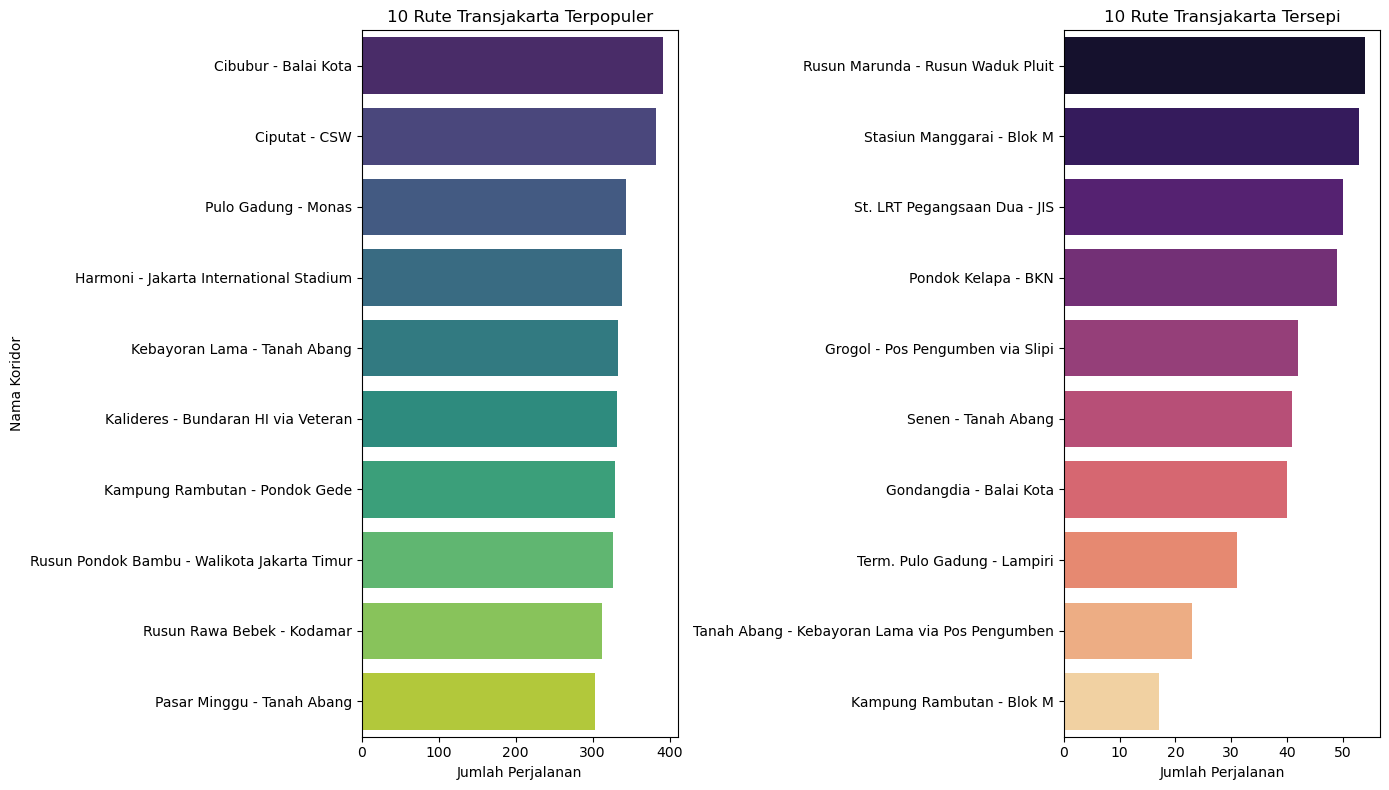

In [390]:
plt.figure(figsize=(14, 8))

# Plot rute terpopuler
plt.subplot(1, 2, 1)
sns.barplot(x='trip_count', y='corridorName', data=top_10_routes, palette='viridis')
plt.title('10 Rute Transjakarta Terpopuler')
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('Nama Koridor')

# Plot rute tersepi
plt.subplot(1, 2, 2)
sns.barplot(x='trip_count', y='corridorName', data=bottom_10_routes, palette='magma')
plt.title('10 Rute Transjakarta Tersepi')
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Hasil Analisis:**

- Rute terpopuler: Rute Cibubur-Balai Kota, khususnya yang dilayani oleh bus Royaltrans 1T, ramai karena menjadi jalur utama untuk perjalanan dari Cibubur ke pusat kota. Hal ini dikarenakan rute ini melayani banyak penumpang, terutama mereka yang bekerja atau bersekolah di pusat kota.

- Rute tersepi: Biasanya rute pengumpan (feeder) atau yang bersaing dengan transportasi lain (contoh: rute dekat MRT/LRT).

**Korelasi dengan Data Lain**

Rata-rata pembayaran di rute populer: Rp5,403
Rata-rata pembayaran di rute sepi: Rp3,500


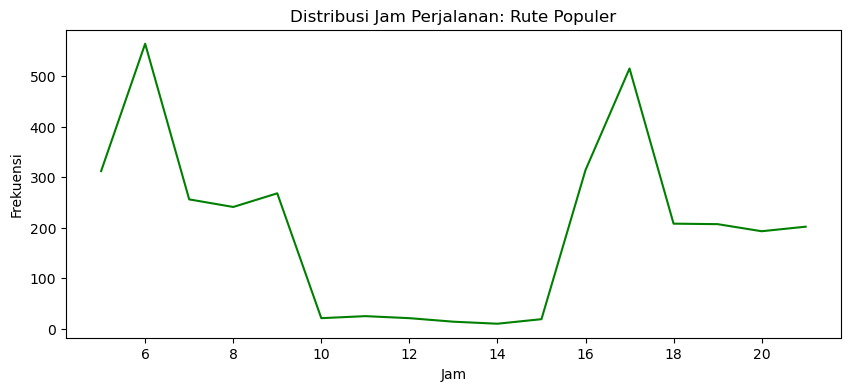

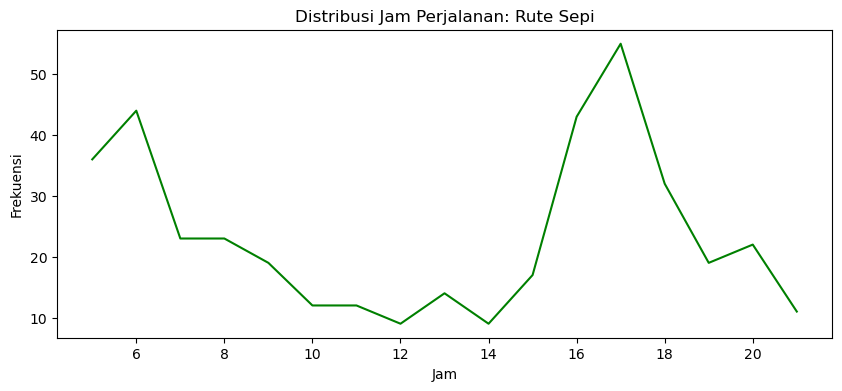

In [391]:
# Cek rata-rata pembayaran di rute populer vs sepi
avg_payment_popular = df[df['corridorName'].isin(top_10_routes['corridorName'])]['payAmount'].mean()
avg_payment_quiet = df[df['corridorName'].isin(bottom_10_routes['corridorName'])]['payAmount'].mean()

print(f"Rata-rata pembayaran di rute populer: Rp{avg_payment_popular:,.0f}")
print(f"Rata-rata pembayaran di rute sepi: Rp{avg_payment_quiet:,.0f}")

# Cek distribusi waktu perjalanan
def plot_time_distribution(routes, title):
    df_filtered = df[df['corridorName'].isin(routes)]
    hourly_counts = df_filtered['hour'].value_counts().sort_index()
    plt.figure(figsize=(10, 4))
    sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, color='green')
    plt.title(f'Distribusi Jam Perjalanan: {title}')
    plt.xlabel('Jam')
    plt.ylabel('Frekuensi')

plot_time_distribution(top_10_routes['corridorName'], 'Rute Populer')
plot_time_distribution(bottom_10_routes['corridorName'], 'Rute Sepi')

# Analisis Penyebab Kepadatan & Kekosongan

## Rute populer:

- Lokasi : Pusat bisnis/kampus

- Pesaing : Minim Pesaing. Paling hanya MRT/LRT

- Waktu Operasional : Sibuk di jam kerja

- Fasilitas Halte : Halte besar (integrasi MRT)

## Rute sepi:

- Lokasi : kawasan sub-urban

- Pesaing : Banyak pesaing. Angkot dan Ojol

- Waktu Operasional : Sibuk di jam kerja

- Fasilitas Halte : Halte kecil

# Rekomendasi Optimasi Operasional

# Untuk Rute Populer
* Tambah frekuensi bus pada jam sibuk (5-7 AM & 4-6 PM).

* Sediakan bus ekstra besar (articulated buses) untuk rute seperti Cibubur-Balai Kota.

* Integrasikan dengan MRT/LRT: Perbaiki akses halte transit.

# Untuk Rute Sepi
* Lakukan uji coba:

Gabungkan dengan rute terdekat (contoh: Feeder-BKN digabung dengan Koridor 13).

Ubah menjadi rute on-demand (microtransit) di jam tertentu.

* Promosi khusus:

Diskon 50% untuk 3 bulan pertama.

Paket integrasi dengan moda lain (contoh: gratis Transjakarta jika naik LRT).

* Evaluasi kelayakan:

Jika penumpang < 100/hari setelah 6 bulan, pertimbangkan penggantian moda (misal: jadi Transjakarta Mikro).

## Distribusi Harian/Mingguan

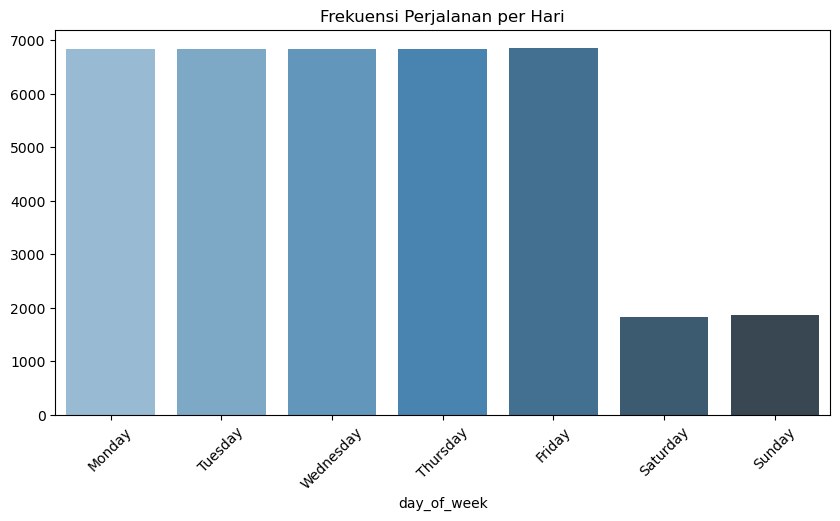

In [392]:
# Ekstrak hari dan minggu dari timestamp
df['day_of_week'] = df['tapInTime'].dt.day_name()  
df['week_number'] = df['tapInTime'].dt.isocalendar().week  

# Hitung perjalanan per hari
daily_counts = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='Blues_d')
plt.title('Frekuensi Perjalanan per Hari')
plt.xticks(rotation=45)
plt.show()

Insight:

Hari kerja (Senin-Jumat) lebih padat daripada akhir pekan.

## Pola Harian (Per Jam)

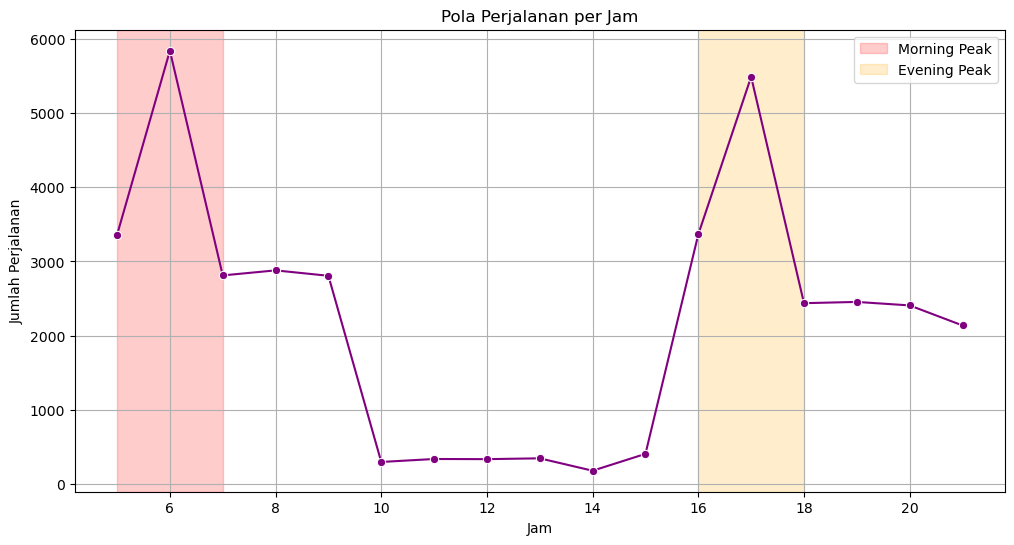

In [393]:
# Hitung perjalanan per jam
hourly_counts = df.groupby('hour').size()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='purple')
plt.axvspan(5, 7, color='red', alpha=0.2, label='Morning Peak')
plt.axvspan(16, 18, color='orange', alpha=0.2, label='Evening Peak')
plt.title('Pola Perjalanan per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Perjalanan')
plt.legend()
plt.grid()
plt.show()

Insight:

Jam sibuk: 5-7 AM dan 4-6 PM.

Rekomendasi: Tambah frekuensi bus pada rentang ini.

## Peta Interaktif dengan Folium

In [394]:
import folium

# Ambil koordinat halte (contoh: 5 halte teratas)
top_stops = df['tapInStopsName'].value_counts().head(5).index
stops_data = df[df['tapInStopsName'].isin(top_stops)][['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates()

# Buat peta Jakarta
jakarta_map = folium.Map(location=[-6.2008, 106.8456], zoom_start=12)

# Tambahkan marker halte
for _, row in stops_data.iterrows():
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        popup=row['tapInStopsName'],
        icon=folium.Icon(color='blue')
    ).add_to(jakarta_map)

jakarta_map.save('top_stops.html')  # Buka di browser

Output: Peta dengan lokasi halte tersibuk.

## Ekspor dari Python

In [395]:
df.to_csv('transjakarta_for_tableau.csv', index=False)

## Public Tableau
https://public.tableau.com/app/profile/muhammad.jazman.ghufran/viz/GrafikTableu/Dashboard1?publish=yes